In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
#Data import
filePath="Data/winequality-red.csv"
df=pd.read_csv(filePath, sep=";", encoding="utf-8")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
#Scaling 
X=pd.DataFrame(scale(df), index=df.index, columns=df.columns)
print(X.shape)

#KMeans
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

(1599, 12)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
km1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [8]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['cluster'] = km1.labels_

 # means for full scaled data
display(X.groupby('cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.510586,0.420842,-0.573204,-0.072861,-0.133732,0.103352,0.141714,-0.224861,0.389140,-0.325538,-0.166505,-0.265506
1,0.887405,-0.731428,0.996236,0.126634,0.232428,-0.179628,-0.246302,0.390812,-0.676331,0.565789,0.289388,0.461453


Citric acid and fixed acidity are the most important.

In [20]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
X['cluster'] = km2.labels_

 # means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.064045,0.050084,0.099918,0.361867,-0.002867,1.024745,1.267761,0.296404,-0.171839,-0.181772,-0.546743,-0.437077
1,0.948582,-0.731324,1.008170,0.037305,0.241678,-0.432296,-0.466686,0.364027,-0.728786,0.587733,0.379856,0.561225
2,-0.646621,0.498127,-0.781045,-0.228904,-0.172255,-0.261240,-0.372202,-0.427385,0.620225,-0.321298,0.032046,-0.159665


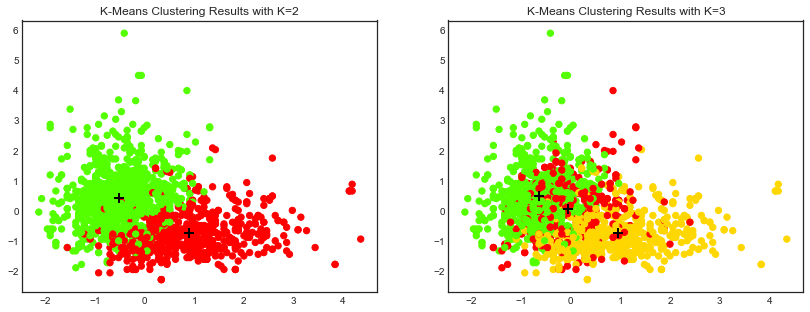

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X.values[:,0], X.values[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X.values[:,0], X.values[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);


2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

In [24]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4,   # note that we select the clusters
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)    # extract cluster labels for each observation in data
print(labels)

[2 2 2 ... 2 2 2]


3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [9]:
#PCA
PCA().fit(X).components_.T

array([[ 4.76113628e-01,  3.41316260e-02, -1.68047581e-01,
        -2.32063413e-01, -7.84825629e-02,  5.40335092e-02,
        -3.07864780e-01,  1.96931725e-01, -1.70231127e-01,
        -1.71314564e-01, -2.63912051e-01, -4.44998884e-01,
         4.70547101e-01],
       [-2.77939048e-01,  3.16719199e-01, -2.22935868e-01,
         4.31017576e-02,  2.98991954e-01,  2.96974873e-01,
        -6.22541184e-01,  1.61930461e-01, -6.24050691e-02,
         1.46634670e-01,  3.84769638e-01, -4.97953053e-02,
        -5.99002654e-02],
       [ 4.70835269e-01, -1.00914035e-01,  9.62873079e-02,
        -5.79210438e-02, -1.19807095e-01,  1.36685587e-01,
         2.42603593e-01,  2.80687046e-01, -2.09940716e-01,
         3.59169387e-01,  6.12767075e-01,  1.64336518e-01,
         9.62199081e-02],
       [ 1.26808634e-01,  1.76584103e-01,  2.43635660e-01,
        -3.83227699e-01,  7.09377947e-01,  1.09674283e-01,
         2.81522124e-01, -1.76038742e-01,  2.75990323e-01,
        -5.66046324e-02,  8.92752171e

In [27]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12', 'V13'])
pca_loadings

ValueError: Shape of passed values is (13, 13), indices imply (13, 12)